<a href="https://colab.research.google.com/github/maronga/Dsp13-Prep-Final-Team-5-Project/blob/main/%22Moringa_Data_Science_Team_5_MISSING_MIGRANTS_PROJECT%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MISSING MIGRANTS PROJECT**

##Business problem


Every year, hundreds of thousands of people leave their homes in search of a better life. In the process, many are injured or killed thus IOM came up with the Missing Migrants Project to track deaths of migrants and those who have gone missing along migratory routes across the globe. This enables them to identify ways of curbing death among migrants and understand the background of those who are most at risk to lose their life during migration.


**Defining the Metric for Success**

This analysis requires us to come up with a solution that will help provide a better understanding on the leading cause of death of migrants.We therefore need to identify the metrics that are signifinant in determining this and offer insights.We will implement the solution by performing the analysis.


**Understanding the context**

The International Organization for Migration (IOM)’s Missing Migrants Project records incidents in which migrants, including refugees and asylum-seekers, have died at state borders or in the process of migrating to an international destination. It was developed in response to disparate reports of people dying or disappearing along migratory routes around the world.The data is used to inform the Sustainable Development Goals Indicator 10.7.3 on the “[n]number of people who died or disappeared in the process of migration towards an international destination.”

More than 40,000 people have lost their lives during unsafe migration journeys since 2014. The data collected by the Missing Migrants Project bear witness to one of the great political failures of modern times. IOM calls for immediate safe, humane and legal routes for migration. Better data can help inform policies to end migrant deaths and address the needs of families left behind.


# Business Understanding

## Business Objective

To find the leading cause of migrants death and the factors that may add/influence it

## Research Questions

1.What was the leading cause of death?

2.Which migrant’s region of origin had the highest deaths?

3.Which migrant's region of origin had the highest missing people?

4 What was the most affected nationality?

5.Which incident region had the highest number of dead people

6.Which incident region had the highest number of missing people?

# Importing Libraries

In [ ]:
# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

# Loading and reading our dataset

The dataset [can be found here](https://www.kaggle.com/jmataya/missingmigrants)

In [ ]:
#reading and loading our dataset
mm= pd.read_csv('/content/MissingMigrantsProject.csv', encoding= 'unicode_escape')

In [ ]:
mm.tail()

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,source,reliability,lat,lon
2415,184746,Drowning,Central America & Mexico,NaN,NaN,1.0,U.S./Mexico Border,20/05/2017,Líder Informativo,Partially Verified,27.455267,-99.493386
2416,184747,Train accident,Central America & Mexico,Honduras,NaN,1.0,U.S./Mexico Border,26/05/2017,netnoticias.mx,Partially Verified,28.712901,-100.497975
2417,184748,NaN,Central America & Mexico,Honduras,NaN,1.0,U.S./Mexico Border,27/05/2017,Águilas del Desierto,Partially Verified,32.304420,-112.904651
2418,184749,Train accident,Central America & Mexico,NaN,NaN,1.0,Central America incl. Mexico,29/05/2017,Zócalo,Partially Verified,26.777611,-101.429548
2419,184750,Dehydration,Sub-Saharan Africa,"Ghana, Nigeria",NaN,44.0,North Africa,31/05/2017,IOM Niger,Verified,18.917266,12.477509


# **Data Understanding**

In [ ]:
#getting info
mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2420 non-null   int64  
 1   cause_of_death        2217 non-null   object 
 2   region_origin         1977 non-null   object 
 3   affected_nationality  845 non-null    object 
 4   missing               271 non-null    float64
 5   dead                  2318 non-null   float64
 6   incident_region       2410 non-null   object 
 7   date                  2411 non-null   object 
 8   source                2413 non-null   object 
 9   reliability           2096 non-null   object 
 10  lat                   2416 non-null   float64
 11  lon                   2416 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 227.0+ KB


There are three different types of datatypes.

In [ ]:
#describing our dataset
mm.describe()

,id,missing,dead,lat,lon
count,2420.00000,271.000000,2318.000000,2416.000000,2416.000000
mean,95926.26405,39.656827,4.729077,26.901380,-13.995935
std,62191.92252,84.130918,20.539717,11.518420,61.694081
min,1.00000,0.000000,0.000000,-26.224531,-117.070560
25%,28571.25000,3.000000,1.000000,19.535706,-97.035666
50%,121178.00000,10.000000,1.000000,29.348889,14.471100
75%,144678.25000,33.000000,3.000000,34.041291,32.010437
max,184750.00000,750.000000,750.000000,66.967199,116.224928


These are the basic statistical values.

Several columns have missing values.

In [ ]:
#getting the shape of our dataset
mm.shape

(2420, 12)

The dataframe has 2420 rows and 12 columns.

In [ ]:
#looking for duplicates
mm.duplicated(keep=False).sum()

0

The dataframe has no duplicates.

# **Data** **Cleaning**
This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis.

## Validity

In [ ]:
mm.columns

Index(['id', 'cause_of_death', 'region_origin', 'affected_nationality',
       'missing', 'dead', 'incident_region', 'date', 'source', 'reliability',
       'lat', 'lon'],
      dtype='object')

In [ ]:
#Procedure 1: Irrelevant Data
#Data Cleaning Action:Dropping
#Explanation:dropped the columns since they had data which was not necessary for the analysis
mm.drop(['source','lat', 'lon',],axis=1,inplace=True)
mm

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,reliability
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,Verified
1,3,Fell from train,Central America & Mexico,Honduras,NaN,1.0,Central America incl. Mexico,03/11/2015,Partially Verified
2,4,Presumed drowning,Middle East,NaN,NaN,1.0,Mediterranean,03/11/2015,Verified
3,6,Drowning,MENA,NaN,6.0,4.0,Mediterranean,01/11/2015,Partially Verified
4,7,Vehicle accident,South East Asia,Cambodia,NaN,4.0,Southeast Asia,01/11/2015,Partially Verified
...,...,...,...,...,...,...,...,...,...
2415,184746,Drowning,Central America & Mexico,NaN,NaN,1.0,U.S./Mexico Border,20/05/2017,Partially Verified
2416,184747,Train accident,Central America & Mexico,Honduras,NaN,1.0,U.S./Mexico Border,26/05/2017,Partially Verified
2417,184748,NaN,Central America & Mexico,Honduras,NaN,1.0,U.S./Mexico Border,27/05/2017,Partially Verified
2418,184749,Train accident,Central America & Mexico,NaN,NaN,1.0,Central America incl. Mexico,29/05/2017,Partially Verified


In [ ]:
mm.shape

(2420, 9)

We have 9 columns after dropping the 3 irrelevant ones. We dropped the columns since they were not required in our analysis.

In [ ]:
#importing the library
import matplotlib.pyplot as plt
#visualising outliers using boxplot

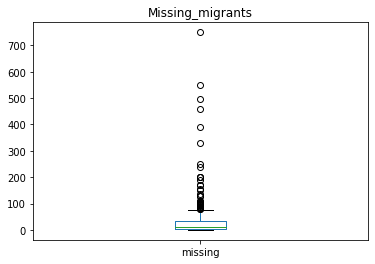

In [ ]:
#Procedure 2: Outliers
#Data Cleaning Action:Checking for outliers on the 'missing'
#Explanation: We will check for outliers on the required columns separately
mm.boxplot(column =['missing'], grid = False) 
plt.title('Missing_migrants')
plt.show()

There are few outliers but we will keep them because they are critical information which can't be ignored

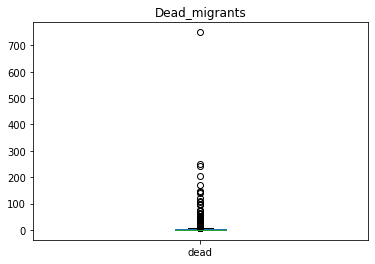

In [ ]:
#Procedure 2: Outliers
#Data Cleaning Action:Checking for outliers on the 'dead' column
mm.boxplot(column =['dead'], grid = False) 
plt.title('Dead_migrants')
plt.show()

There are outliers but we will keep them because they are critical information which can't be ignored

## Accuracy

In [ ]:
#Procedure 1: None
#Data Cleaning Action: None
#Explanation:None

*COMPLETENESS*

In [ ]:
#Procedure 1: Missing values
#Data Cleaning Action: Counting
#Explanation:counting missing values
mm.isnull().sum()

id                         0
cause_of_death           203
region_origin            443
affected_nationality    1575
missing                 2149
dead                     102
incident_region           10
date                       9
reliability              324
dtype: int64

In [ ]:
#Procedure 2: Missing values
#Data Cleaning Action: Checking percentage of the missing values
mm.isna().mean().round(4) * 100

id                       0.00
cause_of_death           8.39
region_origin           18.31
affected_nationality    65.08
missing                 88.80
dead                     4.21
incident_region          0.41
date                     0.37
reliability             13.39
dtype: float64

Each column has missing values apart from the id column.

In [ ]:
#Procedure 3: Missing values(missing and dead columns)
#Data Cleaning Action: Replacing
#Explanation:We replaced the missing values with 0
missing_value=0
mm['missing'].fillna(missing_value,inplace=True)
dead_value=0
mm['dead'].fillna(dead_value,inplace=True)
mm

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,reliability
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,Verified
1,3,Fell from train,Central America & Mexico,Honduras,0.0,1.0,Central America incl. Mexico,03/11/2015,Partially Verified
2,4,Presumed drowning,Middle East,NaN,0.0,1.0,Mediterranean,03/11/2015,Verified
3,6,Drowning,MENA,NaN,6.0,4.0,Mediterranean,01/11/2015,Partially Verified
4,7,Vehicle accident,South East Asia,Cambodia,0.0,4.0,Southeast Asia,01/11/2015,Partially Verified
...,...,...,...,...,...,...,...,...,...
2415,184746,Drowning,Central America & Mexico,NaN,0.0,1.0,U.S./Mexico Border,20/05/2017,Partially Verified
2416,184747,Train accident,Central America & Mexico,Honduras,0.0,1.0,U.S./Mexico Border,26/05/2017,Partially Verified
2417,184748,NaN,Central America & Mexico,Honduras,0.0,1.0,U.S./Mexico Border,27/05/2017,Partially Verified
2418,184749,Train accident,Central America & Mexico,NaN,0.0,1.0,Central America incl. Mexico,29/05/2017,Partially Verified


We replaced the missing values from both the missing and dead 
columns with 0 rather than dropping them or replacing them with the mean/median because of how crucial the data is for the research. We cannot assume/force the no of fatalities that take place because this will hinder the sincerity of the results.

In [ ]:
#Procedure 4: Missing values(missing and dead columns)
#Data Cleaning Action: Counter- Checking
#Explanation:We check if the missing values from both columns have 
# been replaced
mm.isnull().sum()

id                         0
cause_of_death           203
region_origin            443
affected_nationality    1575
missing                    0
dead                       0
incident_region           10
date                       9
reliability              324
dtype: int64

The missing values in the respective columns have been replaced.

In [ ]:
#Procedure 5: Missing values(all columns apart from the date column)
#Data Cleaning Action: Replacing the missing values(object type)
# with unknown
#Explanation:We replaced the missing values with unknown
nulls='unknown'
mm['cause_of_death'].fillna(nulls,inplace=True)
mm['region_origin'].fillna(nulls,inplace=True)
mm['affected_nationality'].fillna(nulls,inplace=True)
mm['incident_region'].fillna(nulls,inplace=True)
mm['reliability'].fillna(nulls,inplace=True)
mm.head(30)

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,reliability
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,Verified
1,3,Fell from train,Central America & Mexico,Honduras,0.0,1.0,Central America incl. Mexico,03/11/2015,Partially Verified
2,4,Presumed drowning,Middle East,unknown,0.0,1.0,Mediterranean,03/11/2015,Verified
3,6,Drowning,MENA,unknown,6.0,4.0,Mediterranean,01/11/2015,Partially Verified
4,7,Vehicle accident,South East Asia,Cambodia,0.0,4.0,Southeast Asia,01/11/2015,Partially Verified
5,8,Drowning,MENA,unknown,0.0,11.0,Mediterranean,01/11/2015,Verified
6,9,Drowning,MENA,unknown,0.0,1.0,Mediterranean,01/11/2015,Verified
7,10,Drowning,MENA,unknown,0.0,1.0,Mediterranean,01/11/2015,Verified
8,11,Drowning,unknown,unknown,0.0,3.0,Mediterranean,28/10/2015,Partially Verified
9,12,Died of unknown cause in hospital shortly afte...,MENA,Syria,0.0,1.0,Mediterranean,28/10/2015,Verified


We cannot predict/guess what caused the death of a victim or what their nationality/region of origin might be without a proper investigation being done. Though a row has a missing column it may contain another column with critical information for the research.

In [ ]:
#Procedure 5: Missing values
#Data Cleaning Action: Counter- Checking
#Explanation:We check if the missing values have been replaced
mm.isnull().sum()

id                      0
cause_of_death          0
region_origin           0
affected_nationality    0
missing                 0
dead                    0
incident_region         0
date                    9
reliability             0
dtype: int64

The missing values have been replaced.

*CONSISTENCY*

In [ ]:
#Procedure 1: Duplicates
#Data Cleaning Action:Checking 
#Explanation:
mm.duplicated().sum()

0

No duplicates

*UNIFORMITY*

In [ ]:
#Procedure 1: Checking the length of unique values in the date column
#Data Cleaning Action:None
#Explanation: We used the len function 
len(mm['date'].unique()) 

835

In [ ]:
#Procedure 2: converting the date column to date time format
#Data Cleaning Action: Change from object type to date time
#Explanation: Change from object type to date time
mm['date'] = pd.to_datetime(mm['date'])
mm['date'].head()

0   2015-05-11
1   2015-03-11
2   2015-03-11
3   2015-01-11
4   2015-01-11
Name: date, dtype: datetime64[ns]

date column data type was changed to datetime (YYYY-MM-DD)

In [ ]:
#Procedure 3: Finding the first and last date entries 
#Data Cleaning Action: None
#Explanation:Use min and max functions
print (mm['date'].min())
print (mm['date'].max())

2014-01-05 00:00:00
2017-12-04 00:00:00


The data contains a series of incident that took place between Jan-2014 and Dec-2017 (3 years)

In [ ]:
#Procedure 4: Missing values(date column)
#Data Cleaning Action:Replacing the missing values with 0
#Explanation: None
null=0
mm['date'].fillna(null,inplace=True)

Replaced the null values in the date column with 0.

In [ ]:
#Procedure 5: Checking for missing values
#Data Cleaning Action: Counting
#Explanation: Using isna() and sum() function
mm.isna().sum()

id                      0
cause_of_death          0
region_origin           0
affected_nationality    0
missing                 0
dead                    0
incident_region         0
date                    0
reliability             0
dtype: int64

There are no missing values.

# **Data Analysis**

In [ ]:
mm.columns

Index(['id', 'cause_of_death', 'region_origin', 'affected_nationality',
       'missing', 'dead', 'incident_region', 'date', 'reliability'],
      dtype='object')

In [ ]:
# Importing the seaborn library as sns
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

**1. What was the leading cause of death?**



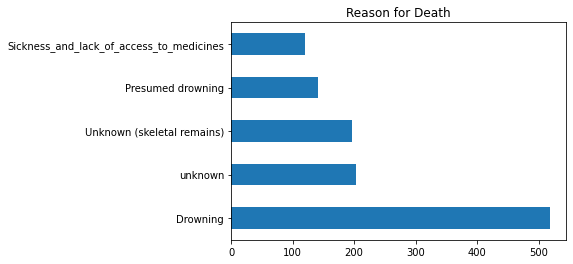

In [ ]:
mm['cause_of_death'].value_counts().head(5).plot(kind = "barh", title = "Reason for Death");


From the graph, we can clearly see that drowning is the leading cause of death.

**2. Which migrant’s region of origin had the highest deaths?**

In [ ]:
mm.groupby('region_origin')['dead'].sum().to_frame().sort_values(by='dead',ascending= False).head(3)

,dead
region_origin,
unknown,2789.0
Horn of Africa (P),1539.0
Sub-Saharan Africa,1378.0


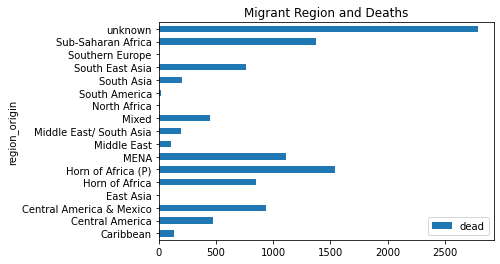

In [ ]:
mm.groupby('region_origin')['dead'].sum().to_frame().plot(kind = "barh", title = "Migrant Region and Deaths");

The region of origin with the highest no. of dead people is unknown,
then followed by presumed Horn of Africa region. 

**3. Which migrant’s region of origin had the highest missing people?**

In [ ]:
mm.groupby('region_origin')['missing'].sum().to_frame().sort_values(by='missing',ascending= False).head(3)

,missing
region_origin,
unknown,2803.0
Mixed,2314.0
Sub-Saharan Africa,2290.0


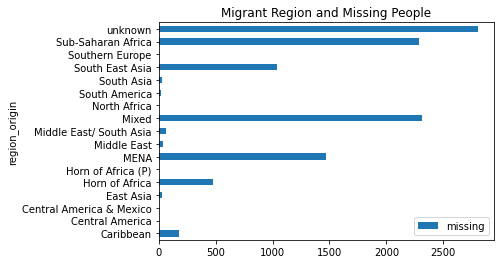

In [ ]:
mm.groupby('region_origin')['missing'].sum().to_frame().plot(kind = "barh", title = "Migrant Region and Missing People");

The region of origin with the highest no. of missing people is unknown.The second highest is from people of mixed race, closely followed by people from Sub-Saharan Africa

**4 What was the most affected nationality?**

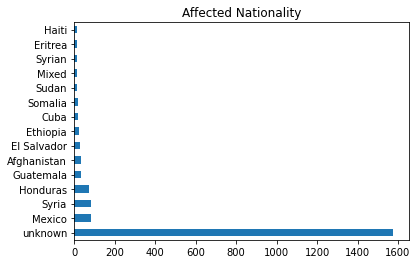

In [ ]:
mm['affected_nationality'].value_counts().head(15).plot(kind = "barh", title = "Affected Nationality");

The most affected nationality was unknown then followed by Mexico.

**5. Which incident region had the highest deaths**

In [ ]:
mm.groupby('incident_region')['dead'].sum().to_frame().sort_values(by='dead',ascending= False).head(2)

,dead
incident_region,
Mediterranean,4826.0
North Africa,2257.0


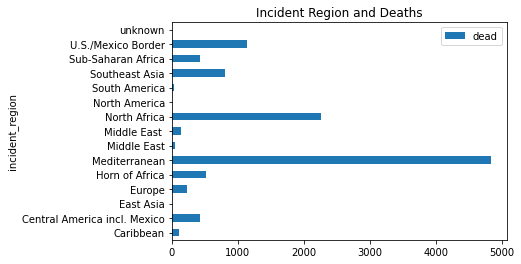

In [ ]:
mm.groupby('incident_region')['dead'].sum().to_frame().plot(kind = "barh", title = "Incident Region and Deaths")

Most death incidents occured in the Mediterranean region.

**6. Which incident region had the highest missing people**

In [ ]:
mm.groupby('incident_region')['missing'].sum().to_frame().sort_values(by='missing',ascending= False).head(2)

,missing
incident_region,
Mediterranean,8989.0
Southeast Asia,1032.0


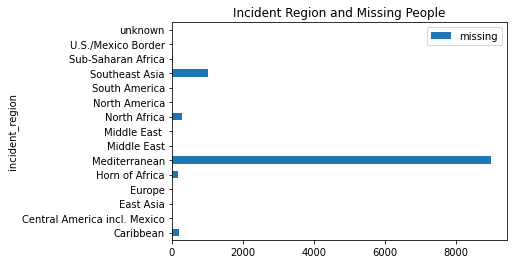

In [ ]:
mm.groupby('incident_region')['missing'].sum().to_frame().plot(kind = "barh", title = "Incident Region and Missing People")

The incident region with highest number of missing people is the Mediterranean Region.

# **Conclusion**

1. Drowning is the leading cause of death.
2. The region of origin with the highest no. of dead people is unknown,
then followed by presumed Horn of Africa region. 
3. The region of origin with the highest no. of missing people is unknown.The second highest is from people of mixed race, closely followed by people from Sub-Saharan Africa.
4. The most affected nationality was unknown then followed by Mexico.
5. Most death incidents occured in the Mediterranean region.
6. The incident region with highest number of missing people is the Mediterranean Region.

# **Recommendation**

1. Since most deaths are due to drowning,security patrol should be increased along the water routes esp the Mediterranean region.
2. More emphasis should be put on orderly and humane management of migration to avoid deaths.
3. Provide humanitarian assistance to migrants in need, including refugees and internally displaced people.
4. Migration authorities in Mexico should collaborate with the relevant stakeholders to mitigate death and missing of migrants.


# **Data Relevance**
Missing Migrants Project data are compiled from a variety of sources. Sources vary depending on the region and broadly include data from national authorities, such as Coast Guards and Medical Examiners; media reports; NGOs; and interviews with survivors of shipwrecks. In the Mediterranean region, data are relayed from relevant national authorities to IOM field missions, who then share it with the Missing Migrants Project team. Data are also obtained by IOM and other organizations that receive survivors at landing points in Italy and Greece. In other cases, media reports are used. IOM and UNHCR also regularly coordinate on such data to ensure consistency. Data on the U.S./Mexico border are compiled based on data from U.S. county medical examiners and sheriff’s offices, as well as media reports for deaths occurring on the Mexico side of the border. Estimates within Mexico and Central America are based primarily on media and year-end government reports. Data on the Bay of Bengal are drawn from reports by UNHCR and NGOs. In the Horn of Africa, data are obtained from media and NGOs. Data for other regions is drawn from a combination of sources, including media and grassroots organizations. In all regions, Missing Migrants Projectdata represents minimum estimates and are potentially lower than in actuality.